In [1]:
# This is a tutorial to create a simple prediction model to perform the following
# 1. Read in and show basic information about the training data
# 2. Create a simple prediction model on a portion of the training data
# 3. Test the quality of the model on a later portion of the data
# 4. Create a final model using all the training data based on the best choices above
# 5. Apply that model to the test data, to be scored on the kaggle.com site

# FILES NEEDED: for this code to work, you will need train_unt.csv and test_unt.csv
# in the same folder as this notebook

In [2]:
import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# read the data and display the first 5 rows
train_df = pd.read_csv(r'C:\Users\bhara\Desktop\train_unt.csv', header=0)

print("\nNumber of samples:",train_df.shape[0],"and number of features:",train_df.shape[1],"\n")

train_df.head()


Number of samples: 9174 and number of features: 12 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Understanding basic stats of the data set

In [4]:
# read about the data elsewhere, however, it is critical to observe the data to make sure
# everything is read in correctly and matches the description

train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


# Create a new feature

In [5]:
# let's take datetime (which isn't very useful to algorithms) and turn it into something useful.
# e.g. this will create a new column for the hour
def hour_of_day(dt):
    return datetime.strptime(dt, "%Y-%m-%d %H:%M:%S").time().hour
train_df['hour'] = train_df['datetime'].map(hour_of_day)
train_df.head()
# note the new column on the right labelled "hour"

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


# Make visualizations to better understand your data

hours: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Text(0.5, 1.0, 'Measured bike use over 2 years')

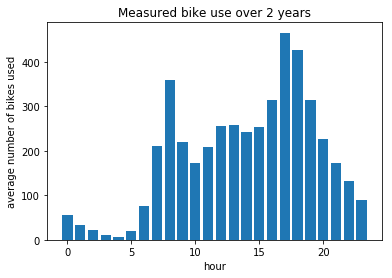

In [6]:
# now let's take a look at the amerage amount of bike use for each hour of the day
# as a "sanity check" to make sure the data makes sense before going further
hours = np.unique(train_df['hour'])
print("hours:",hours)

hours_mean = {}
for h in hours:
    temp_df = train_df.loc[train_df['hour'] == h]
    hours_mean[h] = temp_df['count'].mean()

# plot the results. Maybe should see peaks from bike commuting or evening use
plt.bar(hours,[hours_mean[h] for h in hours])
plt.xlabel("hour")
plt.ylabel("average number of bikes used")
plt.title("Measured bike use over 2 years")

# Support vector regressor classifier

In [34]:
# The below features are highest importance
cols = ['windspeed','temp','atemp','casual','registered']

#from sklearn.svm import SVR
#model = SVR(kernel = 'rbf',C = 100, gamma = 'auto')
#print("columns selected for later:",cols)
#print(model) # to get an idea of parameters and confirm model chosen


NameError: name 'LogisticRegression' is not defined

# Separate your training and test sets

In [32]:
# this is a way of splitting training and testing by hand
# however, there are tools to do this automatically
# google "cross validation" for a better/more advanced strategy
#--------------------

n = len(train_df) # get number of rows in the training set
training_size = 0.75 # fraction of training data to split off for internal testing

# set up separate training and testing sets
# in this case using shuffled array indices
# there are many more ways to do this too
indices = np.array(range(n)) # makes an array of row indices in order
from numpy.random import shuffle
shuffle(indices)
split_point = int(n*training_size)
mytrain_i = indices[0:split_point]
mytest_i = indices[split_point:]

# now use those shuffled indices to separating training from test dataframes
new_train_df = train_df.iloc[mytrain_i]
new_test_df = train_df.iloc[mytest_i]

print("samples in the new training subset:",len(new_train_df))
print("samples in the new test subset:",len(new_test_df))

samples in the new training subset: 6880
samples in the new test subset: 2294


# Fit the model to a portion of the training set, test on the rest and evaluate

In [33]:
# fit the model to the training subset of original training data
model.fit(new_train_df[cols], new_train_df['count'])

# predict on the testing subset of the original training data
pred_count = model.predict(new_test_df[cols])

# score the model on the new test set
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(new_test_df['count'],pred_count))
print("RMS error:",rms)

RMS error: 165.32267329399977


In [10]:
#Cross validation for tuning parameters

In [11]:
from sklearn.model_selection import cross_val_score
accuracies_svr = cross_val_score(estimator = model, X = new_train_df[cols], y = new_train_df['count'], cv = 5)
print("accuracies of SVR",accuracies_svr)
print(" mean of accuracies of SVR",accuracies_svr.mean())

accuracies of SVR [0.77440661 0.80488594 0.82356236 0.77080492 0.78866625]
 mean of accuracies of SVR 0.7924652169950516


In [12]:
grid_parameters = {'gamma': [10**i for i in range(-5,6)], 'C' : [10**i for i in range(-5,6)]}

In [13]:
#Grid search
from sklearn.model_selection import GridSearchCV
grid_search_svr = GridSearchCV(estimator = model, param_grid = grid_parameters, cv = 5, n_jobs = -1)
grid_search_svr.fit(new_train_df[cols], new_train_df['count'])
best_parameters_of_svr = grid_search_svr.best_params_
print("Best values for the parameters", best_parameters_of_svr)

KeyboardInterrupt: 

# Creating the test file output

In [ ]:
# read in the test data
test_df = pd.read_csv(r'C:\Users\bhara\Desktop\test_unt.csv', header=0)
print("\nNumber of samples:",test_df.shape[0] ,"and number of features:",test_df.shape[1],"\n")

# must add that new feature into the test data too, to use it in prediction
test_df['hour'] = test_df['datetime'].map(hour_of_day)

# show the test data output to be sure it read in correctly and added the column
test_df.head()

# fit the selected model TO YOUR FULL TRAINING SET
model.fit( train_df[cols], train_df['count'])

# apply to the test data FOR WHICH YOU DON'T HAVE THE ANSWERS
# (not the "test set" you used for model selection and tuning)
pred_count = model.predict(test_df[cols])

# add the prediction column (in case you want to inspect it later)
test_df['count'] = pred_count

# save the predicted count as a csv with a header column and datetime row
test_df = test_df[['datetime','count']].to_csv('my_prediction_svr.csv', 
    index=False, header=True)
print("Prediction complete. Saved as my_prediction_svr.csv")